## DataScience Projet

Installation des bibliothèques

In [ ]:
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
      --------------------------------------- 0.1/8.1 MB 3.0 MB/s eta 0:00:03
     - -------------------------------------- 0.4/8.1 MB 4.9 MB/s eta 0:00:02
     --- ------------------------------------ 0.6/8.1 MB 5.1 MB/s eta 0:00:02
     ----- ---------------------------------- 1.0/8.1 MB 6.5 MB/s eta 0:00:02
     ------- -------------------------------- 1.6/8.1 MB 7.2 MB/s eta 0:00:01
     --------- ------------------------------ 1.9/8.1 MB 7.1 MB/s eta 0:00:01
     ------------- -------------------------- 2.8/8.1 MB 8.9 MB/s eta 0:00:01
     --------------- ------------------------ 3.1/8.1 MB 8.5 MB/s eta 0:00:01
     --------------- ------------------------ 3.2/8.1 MB 8.6 MB/s eta 0:00:01
     ---------------- ----------------------- 3.3/8.1 MB 7.3 MB/s eta 0:00:01
     ---------------------- ----------------- 4.5/8.1 MB 9.0 MB/s eta 0:00:01
     ------------------------- -------------- 5.2/8.1 MB 9.5 MB/s eta 0

Importation des bibliothèques

In [1]:
# Détection de Fraude Bancaire - Exploration des Données (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

Configuration graphiques

In [2]:

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 PROJET DÉTECTION DE FRAUDE BANCAIRE")
print("="*50)

📊 PROJET DÉTECTION DE FRAUDE BANCAIRE


In [3]:
# =============================================================
# 1. CHARGEMENT ET PREMIÈRE INSPECTION DES DONNÉES
# =============================================================

def load_and_inspect_data(file_path):
    """
    Charge et inspecte les données de fraude bancaire
    """
    print("\n🔍 CHARGEMENT DES DONNÉES")
    print("-" * 30)
    
    # Chargement des données
    df = pd.read_csv(file_path)
    
    # Informations générales
    print(f"📋 Forme du dataset: {df.shape}")
    print(f"📋 Nombre de transactions: {df.shape[0]:,}")
    print(f"📋 Nombre de features: {df.shape[1]}")
    
    # Aperçu des données
    print("\n📄 Aperçu des premières lignes:")
    print(df.head())
    
    # Types de données
    print("\n🔢 Types de données:")
    print(df.dtypes)
    
    # Informations sur les valeurs manquantes
    print("\n❓ Valeurs manquantes:")
    missing_data = df.isnull().sum()
    print(missing_data[missing_data > 0] if missing_data.sum() > 0 else "Aucune valeur manquante ✅")
    
    return df

In [4]:

# =============================================================
# 2. ANALYSE DE LA VARIABLE CIBLE (FRAUDE)
# =============================================================

def analyze_fraud_distribution(df):
    """
    Analyse la distribution des transactions frauduleuses
    """
    print("\n🎯 ANALYSE DE LA VARIABLE CIBLE")
    print("-" * 35)
    
    # Distribution des classes
    fraud_counts = df['Class'].value_counts()
    fraud_percentage = df['Class'].value_counts(normalize=True) * 100
    
    print("📊 Distribution des classes:")
    print(f"   • Transactions normales (0): {fraud_counts[0]:,} ({fraud_percentage[0]:.2f}%)")
    print(f"   • Transactions frauduleuses (1): {fraud_counts[1]:,} ({fraud_percentage[1]:.2f}%)")
    print(f"   • Ratio de déséquilibre: 1:{fraud_counts[0]/fraud_counts[1]:.0f}")
    
    # Visualisation
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Graphique en barres
    fraud_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
    axes[0].set_title('Distribution des Classes', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Classe (0: Normal, 1: Fraude)')
    axes[0].set_ylabel('Nombre de transactions')
    axes[0].tick_params(axis='x', rotation=0)
    
    # Graphique en secteurs
    colors = ['lightblue', 'lightcoral']
    axes[1].pie(fraud_counts.values, labels=['Normal', 'Fraude'], 
               autopct='%1.2f%%', colors=colors, startangle=90)
    axes[1].set_title('Proportion des Classes', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return fraud_counts, fraud_percentage

In [ ]:

# =============================================================
# 3. ANALYSE DES MONTANTS TRANSACTIONNELS
# =============================================================

def analyze_amounts(df):
    """
    Analyse les montants des transactions
    """
    print("\n💰 ANALYSE DES MONTANTS")
    print("-" * 25)
    
    # Statistiques descriptives
    print("📈 Statistiques des montants:")
    print(df['Amount'].describe())
    
    # Comparaison normale vs fraude
    normal_amounts = df[df['Class'] == 0]['Amount']
    fraud_amounts = df[df['Class'] == 1]['Amount']
    
    print(f"\n💳 Montant moyen - Transactions normales: {normal_amounts.mean():.2f}€")
    print(f"🚨 Montant moyen - Transactions frauduleuses: {fraud_amounts.mean():.2f}€")
    print(f"📊 Médiane - Transactions normales: {normal_amounts.median():.2f}€")
    print(f"📊 Médiane - Transactions frauduleuses: {fraud_amounts.median():.2f}€")
    
    # Visualisations
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Distribution des montants (avec limitation pour visibilité)
    axes[0,0].hist(normal_amounts[normal_amounts <= 2000], bins=50, alpha=0.7, 
                  label='Normal', color='skyblue', density=True)
    axes[0,0].hist(fraud_amounts[fraud_amounts <= 2000], bins=50, alpha=0.7, 
                 label='Fraude', color='salmon', density=True)
    axes[0,0].set_title('Distribution des Montants (≤ 2000€)', fontweight='bold')
    axes[0,0].set_xlabel('Montant (€)')
    axes[0,0].set_ylabel('Densité')
    axes[0,0].legend()
    
    # Box plot comparatif
    df_plot = df[df['Amount'] <= 1000]  # Limitation pour visibilité
    sns.boxplot(data=df_plot, x='Class', y='Amount', ax=axes[0,1])
    axes[0,1].set_title('Box Plot des Montants par Classe (≤ 1000€)', fontweight='bold')
    axes[0,1].set_xlabel('Classe (0: Normal, 1: Fraude)')
    
    # Violin plot
    sns.violinplot(data=df_plot, x='Class', y='Amount', ax=axes[1,0])
    axes[1,0].set_title('Violin Plot des Montants par Classe', fontweight='bold')
    axes[1,0].set_xlabel('Classe (0: Normal, 1: Fraude)')
    
    # Montants élevés
    high_amounts = df[df['Amount'] > 1000]
    high_fraud_rate = high_amounts['Class'].mean() * 100
    axes[1,1].bar(['< 1000€', '≥ 1000€'], 
                 [df[df['Amount'] < 1000]['Class'].mean() * 100, high_fraud_rate],
                 color=['lightblue', 'lightcoral'])
    axes[1,1].set_title('Taux de Fraude par Tranche de Montant', fontweight='bold')
    axes[1,1].set_ylabel('Taux de fraude (%)')
    
    plt.tight_layout()
    plt.show()


In [6]:

# =============================================================
# 4. ANALYSE TEMPORELLE
# =============================================================

def analyze_temporal_patterns(df):
    """
    Analyse les patterns temporels des fraudes
    """
    print("\n⏰ ANALYSE TEMPORELLE")
    print("-" * 20)
    
    # Conversion du temps en heures
    df['Time_hours'] = df['Time'] / 3600
    df['Time_hours'] = df['Time_hours'] % 24  # Modulo 24 pour avoir les heures de la journée
    
    # Patterns horaires
    hourly_fraud_rate = df.groupby(df['Time_hours'].astype(int))['Class'].agg(['count', 'sum', 'mean'])
    hourly_fraud_rate['fraud_rate'] = hourly_fraud_rate['mean'] * 100
    
    print("📅 Analyse par heure de la journée:")
    print(f"   • Heure avec le plus de fraudes: {hourly_fraud_rate['fraud_rate'].idxmax()}h")
    print(f"   • Taux de fraude max: {hourly_fraud_rate['fraud_rate'].max():.3f}%")
    print(f"   • Heure avec le moins de fraudes: {hourly_fraud_rate['fraud_rate'].idxmin()}h")
    print(f"   • Taux de fraude min: {hourly_fraud_rate['fraud_rate'].min():.3f}%")
    
    # Visualisations temporelles
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Distribution temporelle générale
    axes[0,0].hist(df['Time_hours'], bins=24, alpha=0.7, color='lightblue')
    axes[0,0].set_title('Distribution des Transactions par Heure', fontweight='bold')
    axes[0,0].set_xlabel('Heure de la journée')
    axes[0,0].set_ylabel('Nombre de transactions')
    
    # Taux de fraude par heure
    axes[0,1].plot(hourly_fraud_rate.index, hourly_fraud_rate['fraud_rate'], 
                  marker='o', color='red', linewidth=2)
    axes[0,1].set_title('Taux de Fraude par Heure', fontweight='bold')
    axes[0,1].set_xlabel('Heure de la journée')
    axes[0,1].set_ylabel('Taux de fraude (%)')
    axes[0,1].grid(True, alpha=0.3)
    
    # Heatmap des transactions par heure et classe
    pivot_time = df.pivot_table(values='Amount', index=df['Time_hours'].astype(int), 
                               columns='Class', aggfunc='count', fill_value=0)
    sns.heatmap(pivot_time.T, annot=True, fmt='d', ax=axes[1,0], cmap='Blues')
    axes[1,0].set_title('Nombre de Transactions par Heure et Classe', fontweight='bold')
    axes[1,0].set_xlabel('Heure de la journée')
    axes[1,0].set_ylabel('Classe')
    
    # Evolution cumulative
    df_sorted = df.sort_values('Time')
    df_sorted['cumulative_fraud'] = df_sorted['Class'].cumsum()
    df_sorted['cumulative_total'] = range(1, len(df_sorted) + 1)
    df_sorted['cumulative_fraud_rate'] = (df_sorted['cumulative_fraud'] / df_sorted['cumulative_total']) * 100
    
    axes[1,1].plot(df_sorted['Time_hours'], df_sorted['cumulative_fraud_rate'])
    axes[1,1].set_title('Evolution du Taux de Fraude Cumulé', fontweight='bold')
    axes[1,1].set_xlabel('Temps (heures)')
    axes[1,1].set_ylabel('Taux de fraude cumulé (%)')
    
    plt.tight_layout()
    plt.show()

In [7]:
# =============================================================
# 5. ANALYSE DES FEATURES ANONYMISÉES (V1-V28)
# =============================================================

def analyze_pca_features(df):
    """
    Analyse des features V1-V28 (résultats PCA)
    """
    print("\n🔬 ANALYSE DES FEATURES ANONYMISÉES")
    print("-" * 35)
    
    # Sélection des features V
    v_features = [col for col in df.columns if col.startswith('V')]
    print(f"📊 Nombre de features V analysées: {len(v_features)}")
    
    # Statistiques par classe
    normal_data = df[df['Class'] == 0][v_features]
    fraud_data = df[df['Class'] == 1][v_features]
    
    # Moyennes par classe
    mean_diff = abs(normal_data.mean() - fraud_data.mean()).sort_values(ascending=False)
    print(f"\n🎯 Top 5 features avec plus grande différence de moyenne:")
    for i, (feature, diff) in enumerate(mean_diff.head().items(), 1):
        print(f"   {i}. {feature}: {diff:.3f}")
    
    # Visualisations
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Heatmap des corrélations (échantillon)
    correlation_matrix = df[v_features[:14]].corr()  # Première moitié pour visibilité
    sns.heatmap(correlation_matrix, annot=False, ax=axes[0,0], cmap='coolwarm', center=0)
    axes[0,0].set_title('Matrice de Corrélation (V1-V14)', fontweight='bold')
    
    # Distribution des moyennes par classe
    top_features = mean_diff.head(10).index
    normal_means = normal_data[top_features].mean()
    fraud_means = fraud_data[top_features].mean()
    
    x_pos = np.arange(len(top_features))
    width = 0.35
    axes[0,1].bar(x_pos - width/2, normal_means, width, label='Normal', alpha=0.7)
    axes[0,1].bar(x_pos + width/2, fraud_means, width, label='Fraude', alpha=0.7)
    axes[0,1].set_title('Moyennes des Top Features par Classe', fontweight='bold')
    axes[0,1].set_xticks(x_pos)
    axes[0,1].set_xticklabels(top_features, rotation=45)
    axes[0,1].legend()
    
    # Box plot des features les plus discriminantes
    most_discriminant = mean_diff.head(4)
    df_melt = df[list(most_discriminant.index) + ['Class']].melt(id_vars='Class')
    sns.boxplot(data=df_melt, x='variable', y='value', hue='Class', ax=axes[1,0])
    axes[1,0].set_title('Distribution des Features les Plus Discriminantes', fontweight='bold')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Variance par feature
    variances = df[v_features].var().sort_values(ascending=False)
    axes[1,1].bar(range(len(variances[:10])), variances[:10])
    axes[1,1].set_title('Top 10 Features par Variance', fontweight='bold')
    axes[1,1].set_xlabel('Features (ordre décroissant)')
    axes[1,1].set_ylabel('Variance')
    
    plt.tight_layout()
    plt.show()
    
    return mean_diff

In [8]:
# =============================================================
# 6. DÉTECTION D'OUTLIERS
# =============================================================

def detect_outliers(df):
    """
    Détection et analyse des outliers
    """
    print("\n🎯 DÉTECTION D'OUTLIERS")
    print("-" * 25)
    
    # Méthode IQR pour les montants
    Q1 = df['Amount'].quantile(0.25)
    Q3 = df['Amount'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_amount = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
    
    print(f"💰 Outliers détectés sur les montants:")
    print(f"   • Nombre d'outliers: {len(outliers_amount)} ({len(outliers_amount)/len(df)*100:.2f}%)")
    print(f"   • Seuil inférieur: {lower_bound:.2f}€")
    print(f"   • Seuil supérieur: {upper_bound:.2f}€")
    print(f"   • Taux de fraude dans les outliers: {outliers_amount['Class'].mean()*100:.2f}%")
    
    # Visualisation des outliers
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Scatter plot montant vs temps avec couleurs par classe
    normal_tx = df[df['Class'] == 0]
    fraud_tx = df[df['Class'] == 1]
    
    axes[0].scatter(normal_tx['Time'], normal_tx['Amount'], alpha=0.1, s=1, 
                   label='Normal', color='blue')
    axes[0].scatter(fraud_tx['Time'], fraud_tx['Amount'], alpha=0.8, s=10, 
                   label='Fraude', color='red')
    axes[0].set_title('Transactions: Montant vs Temps', fontweight='bold')
    axes[0].set_xlabel('Temps (secondes)')
    axes[0].set_ylabel('Montant (€)')
    axes[0].legend()
    axes[0].set_ylim(0, 2000)  # Limitation pour visibilité
    
    # Distribution des montants avec marquage des outliers
    axes[1].hist(df['Amount'], bins=50, alpha=0.7, color='lightblue', density=True)
    axes[1].axvline(upper_bound, color='red', linestyle='--', label=f'Seuil outlier ({upper_bound:.0f}€)')
    axes[1].set_title('Distribution des Montants avec Seuil Outliers', fontweight='bold')
    axes[1].set_xlabel('Montant (€)')
    axes[1].set_ylabel('Densité')
    axes[1].set_xlim(0, 5000)
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

In [9]:
# =============================================================
# 7. RAPPORT DE SYNTHÈSE
# =============================================================

def generate_summary_report(df, fraud_counts, mean_diff):
    """
    Génère un rapport de synthèse de l'analyse exploratoire
    """
    print("\n" + "="*60)
    print("📋 RAPPORT DE SYNTHÈSE - ANALYSE EXPLORATOIRE")
    print("="*60)
    
    print(f"""
🔍 CARACTÉRISTIQUES GÉNÉRALES:
   • Dataset: {df.shape[0]:,} transactions, {df.shape[1]} features
   • Période analysée: {df['Time'].max()/3600:.1f} heures
   • Taux de fraude global: {fraud_counts[1]/len(df)*100:.3f}%
   • Déséquilibre des classes: 1:{fraud_counts[0]/fraud_counts[1]:.0f}
   
💰 ANALYSE DES MONTANTS:
   • Montant moyen normal: {df[df['Class']==0]['Amount'].mean():.2f}€
   • Montant moyen fraude: {df[df['Class']==1]['Amount'].mean():.2f}€
   • Montant maximum: {df['Amount'].max():.2f}€
   • 95% des transactions < {df['Amount'].quantile(0.95):.2f}€
   
🎯 FEATURES LES PLUS DISCRIMINANTES:
   • Feature #1: {mean_diff.index[0]} (diff: {mean_diff.iloc[0]:.3f})
   • Feature #2: {mean_diff.index[1]} (diff: {mean_diff.iloc[1]:.3f})
   • Feature #3: {mean_diff.index[2]} (diff: {mean_diff.iloc[2]:.3f})
   
⚠️ DÉFIS IDENTIFIÉS:
   • Forte imbalance des classes nécessitant SMOTE
   • Outliers dans les montants à considérer
   • Features anonymisées (PCA) limitent l'interprétation
   • Patterns temporels subtils
   
✅ RECOMMANDATIONS POUR LA MODÉLISATION:
   • Utiliser les features V les plus discriminantes
   • Appliquer SMOTE avec prudence (risque d'overfitting)
   • Tester Isolation Forest (adapté aux anomalies rares)
   • Autoencodeur sur transactions normales uniquement
   • Métriques: Precision-Recall plutôt que accuracy
   • Validation temporelle (split chronologique)
    """)


🚀 Démarrage de l'analyse exploratoire...

🔍 CHARGEMENT DES DONNÉES
------------------------------
📋 Forme du dataset: (284807, 31)
📋 Nombre de transactions: 284,807
📋 Nombre de features: 31

📄 Aperçu des premières lignes:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.9

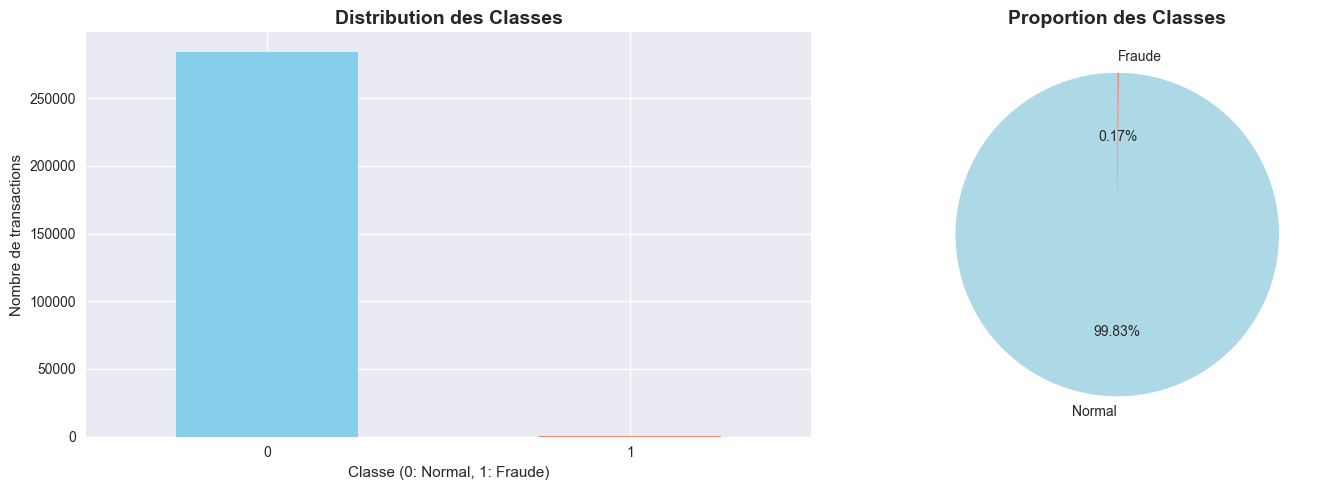


💰 ANALYSE DES MONTANTS
-------------------------
📈 Statistiques des montants:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

💳 Montant moyen - Transactions normales: 88.29€
🚨 Montant moyen - Transactions frauduleuses: 122.21€
📊 Médiane - Transactions normales: 22.00€
📊 Médiane - Transactions frauduleuses: 9.25€


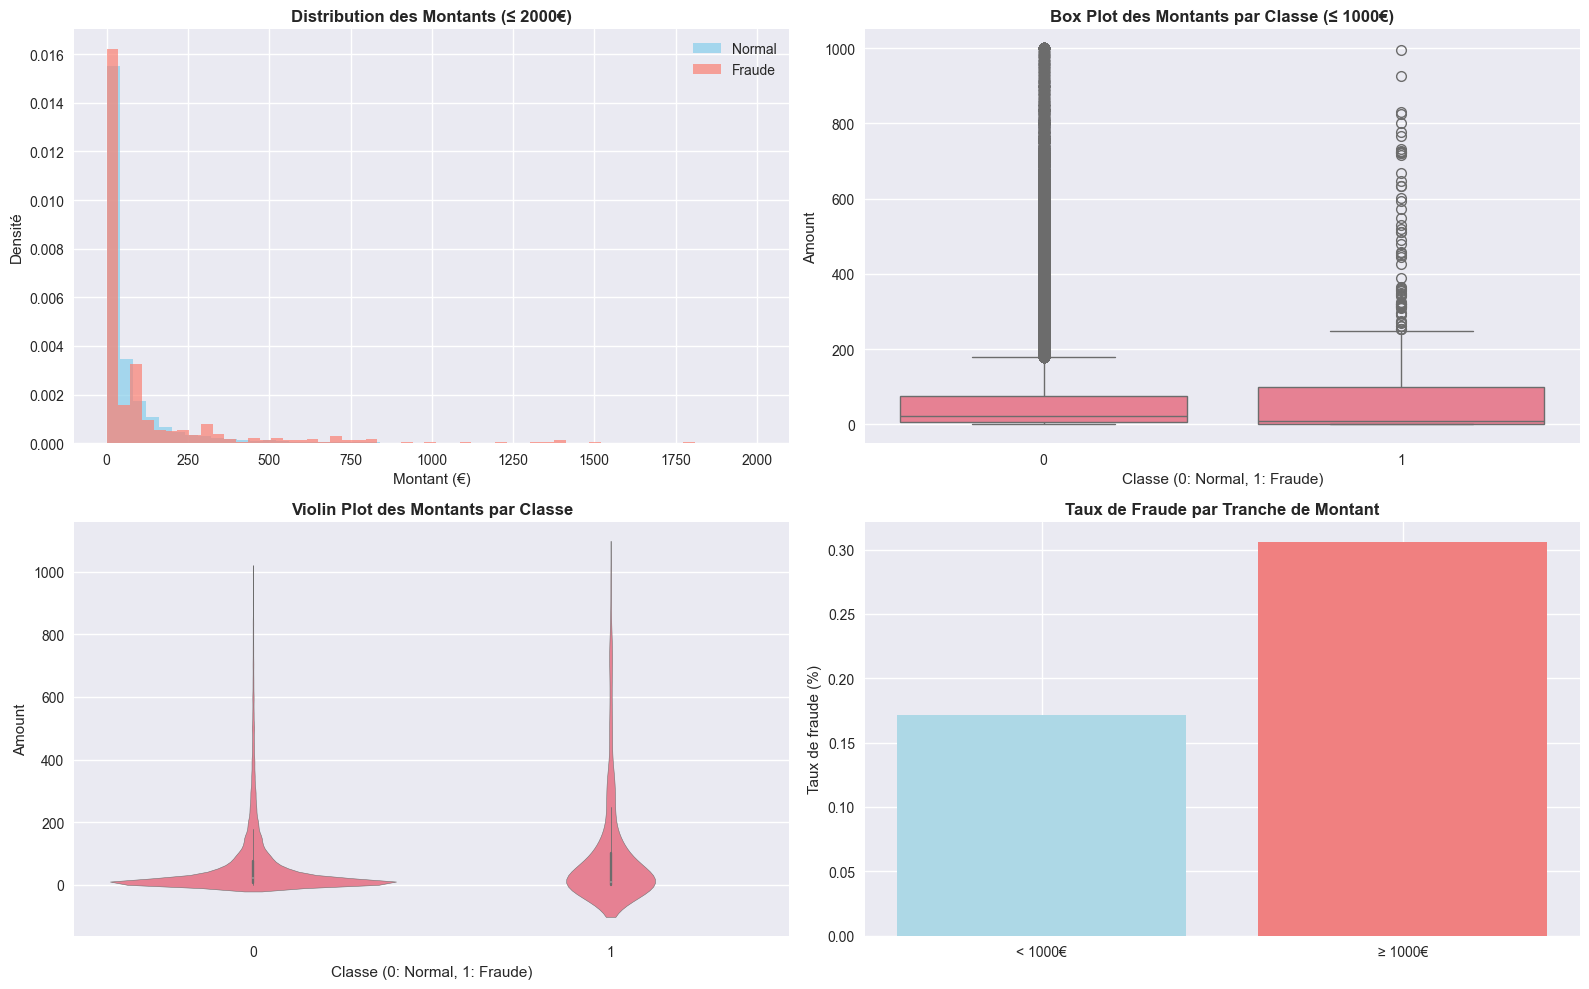


⏰ ANALYSE TEMPORELLE
--------------------
📅 Analyse par heure de la journée:
   • Heure avec le plus de fraudes: 2h
   • Taux de fraude max: 1.713%
   • Heure avec le moins de fraudes: 10h
   • Taux de fraude min: 0.048%


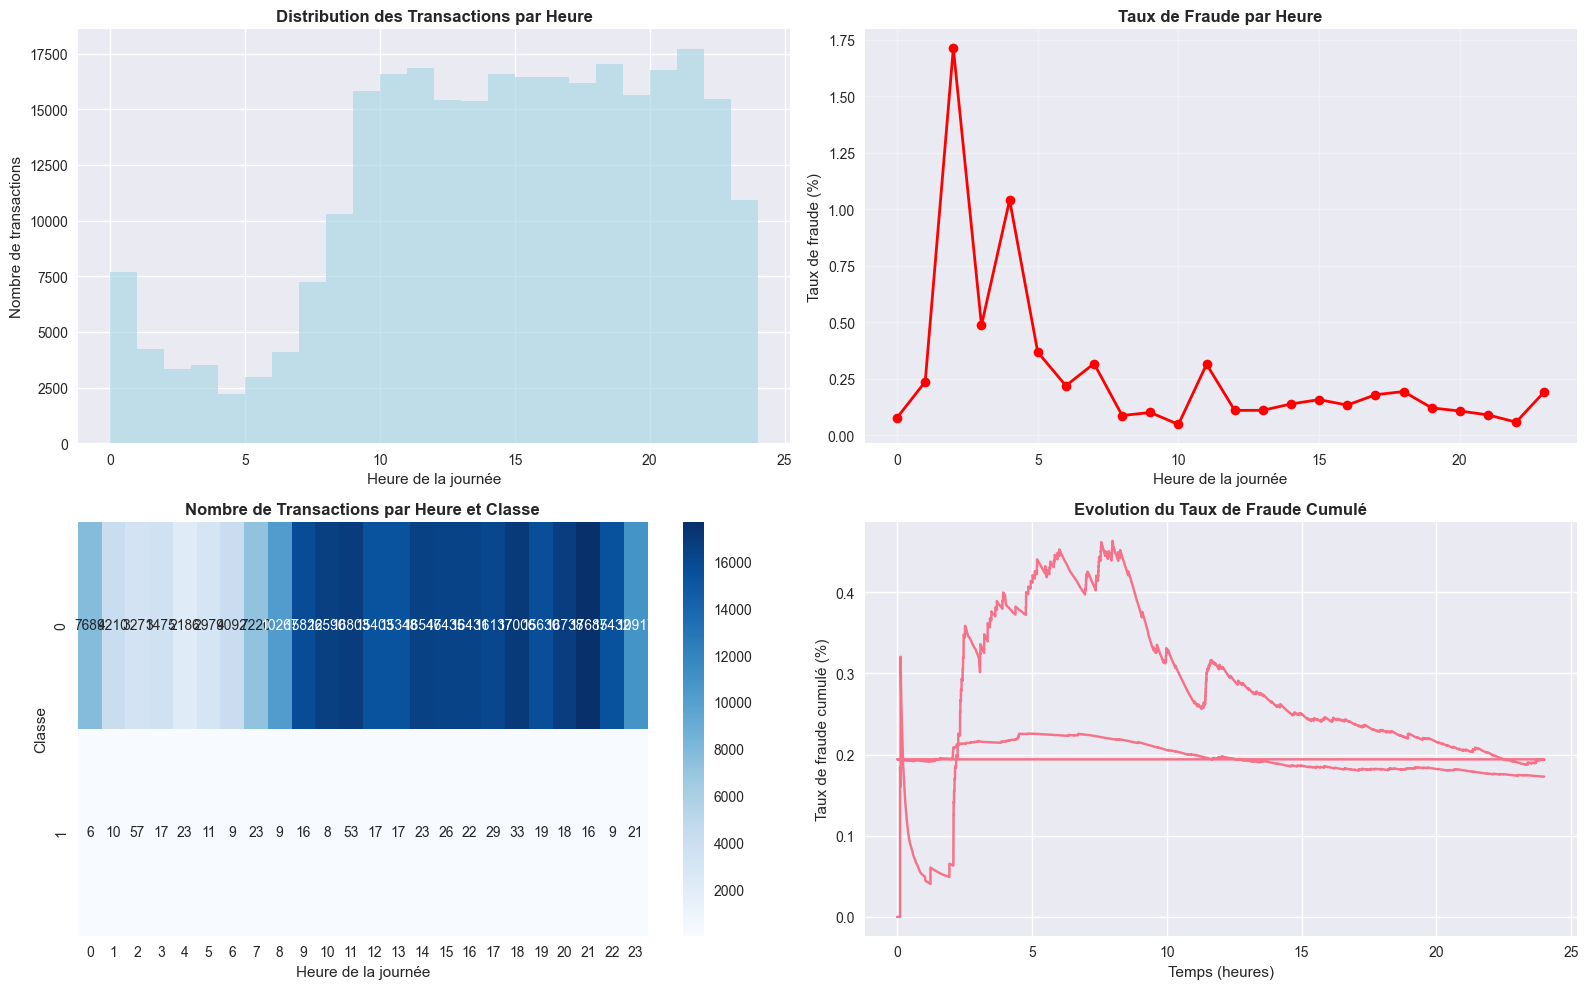


🔬 ANALYSE DES FEATURES ANONYMISÉES
-----------------------------------
📊 Nombre de features V analysées: 28

🎯 Top 5 features avec plus grande différence de moyenne:
   1. V3: 7.045
   2. V14: 6.984
   3. V17: 6.677
   4. V12: 6.270
   5. V10: 5.687


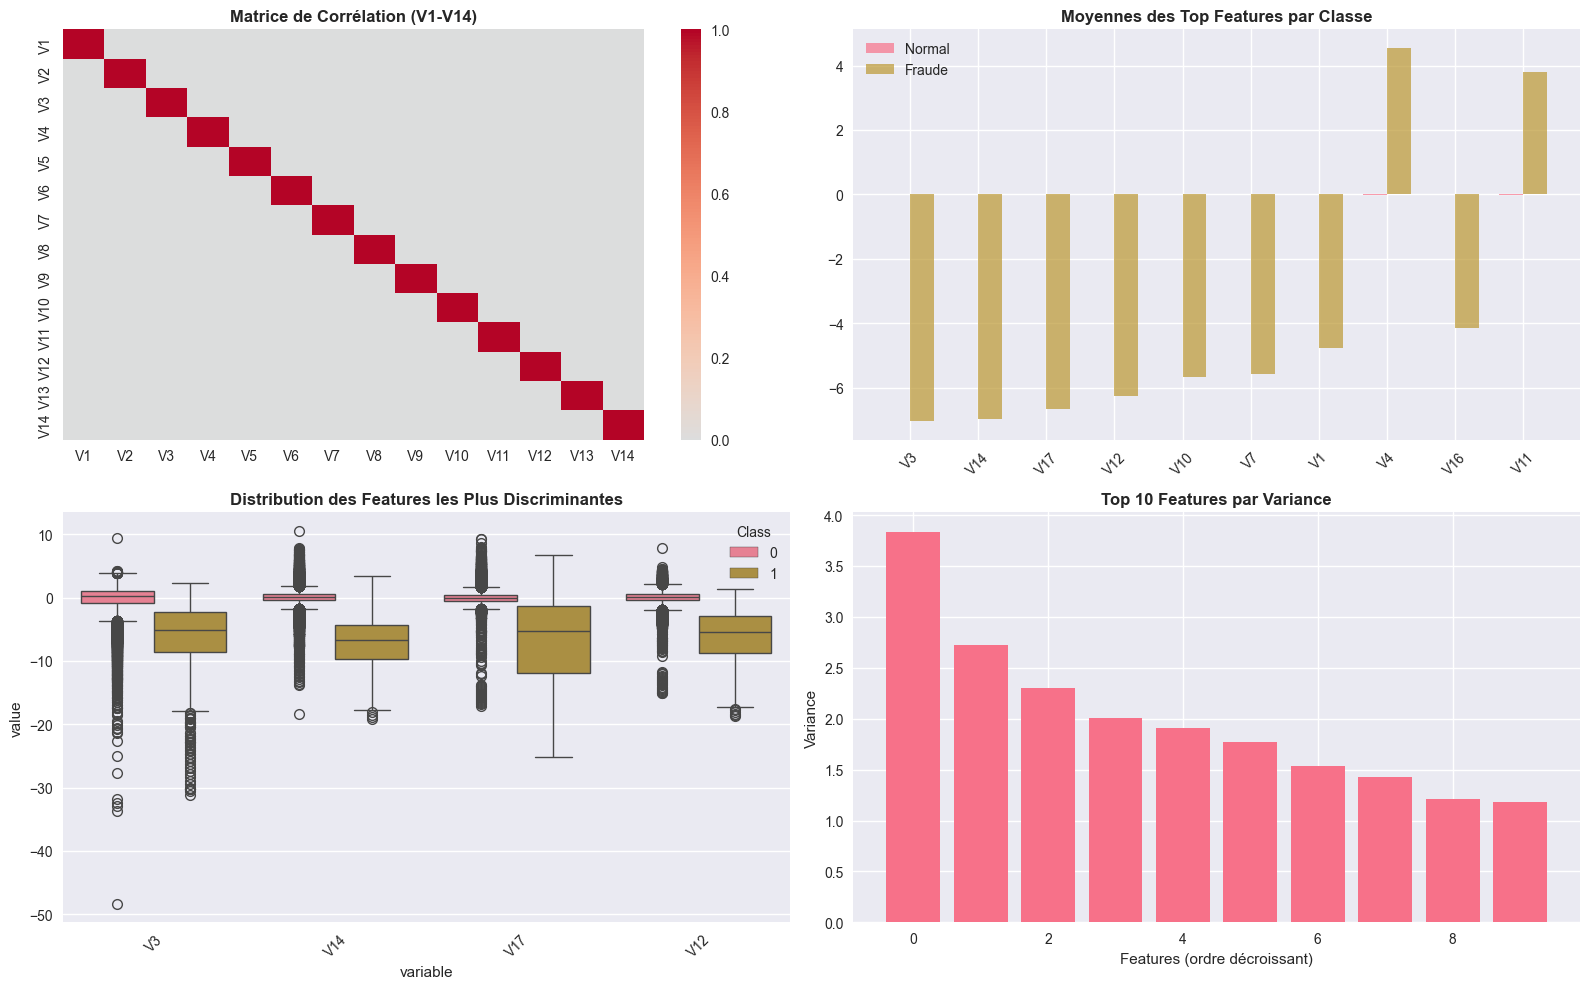


🎯 DÉTECTION D'OUTLIERS
-------------------------
💰 Outliers détectés sur les montants:
   • Nombre d'outliers: 31904 (11.20%)
   • Seuil inférieur: -101.75€
   • Seuil supérieur: 184.51€
   • Taux de fraude dans les outliers: 0.29%


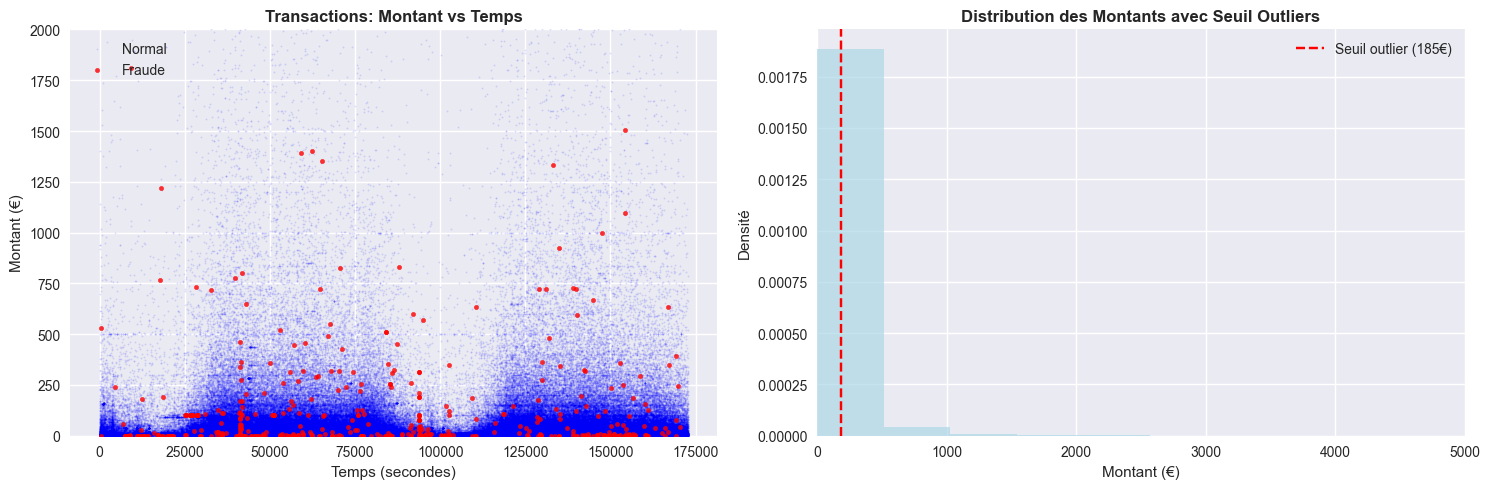


📋 RAPPORT DE SYNTHÈSE - ANALYSE EXPLORATOIRE

🔍 CARACTÉRISTIQUES GÉNÉRALES:
   • Dataset: 284,807 transactions, 32 features
   • Période analysée: 48.0 heures
   • Taux de fraude global: 0.173%
   • Déséquilibre des classes: 1:578
   
💰 ANALYSE DES MONTANTS:
   • Montant moyen normal: 88.29€
   • Montant moyen fraude: 122.21€
   • Montant maximum: 25691.16€
   • 95% des transactions < 365.00€
   
🎯 FEATURES LES PLUS DISCRIMINANTES:
   • Feature #1: V3 (diff: 7.045)
   • Feature #2: V14 (diff: 6.984)
   • Feature #3: V17 (diff: 6.677)
   
⚠️ DÉFIS IDENTIFIÉS:
   • Forte imbalance des classes nécessitant SMOTE
   • Outliers dans les montants à considérer
   • Features anonymisées (PCA) limitent l'interprétation
   • Patterns temporels subtils
   
✅ RECOMMANDATIONS POUR LA MODÉLISATION:
   • Utiliser les features V les plus discriminantes
   • Appliquer SMOTE avec prudence (risque d'overfitting)
   • Tester Isolation Forest (adapté aux anomalies rares)
   • Autoencodeur sur transactions 

In [10]:


# =============================================================
# SCRIPT PRINCIPAL
# =============================================================

if __name__ == "__main__":
    # Note: Remplacez 'creditcard.csv' par le chemin vers votre fichier
    FILE_PATH = 'creditcard.csv'  
    
    print("🚀 Démarrage de l'analyse exploratoire...")
    
    try:
        # 1. Chargement des données
        df = load_and_inspect_data(FILE_PATH)
        
        # 2. Analyse de la distribution des fraudes
        fraud_counts, fraud_percentage = analyze_fraud_distribution(df)
        
        # 3. Analyse des montants
        analyze_amounts(df)
        
        # 4. Analyse temporelle
        analyze_temporal_patterns(df)
        
        # 5. Analyse des features PCA
        mean_diff = analyze_pca_features(df)
        
        # 6. Détection d'outliers
        detect_outliers(df)
        
        # 7. Rapport final
        generate_summary_report(df, fraud_counts, mean_diff)
        
        print("\n✅ Analyse exploratoire terminée avec succès!")
        print("➡️  Prochaine étape: Préparation des données et SMOTE")
        
    except FileNotFoundError:
        print(f"❌ Fichier non trouvé: {FILE_PATH}")
        print("📥 Téléchargez le dataset depuis:")
        print("   https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")
    except Exception as e:
        print(f"❌ Erreur: {e}")